<a href="https://colab.research.google.com/github/aiexpert-Azan/AI-ML-Internship-Tasks/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2**: Predict Future Stock Prices (Short-Term)

In [1]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Download Apple's stock data for the last 2 years
df = yf.download('AAPL', period='2y')
df.head()


/tmp/ipython-input-2-3425861664.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', period='2y')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-07-31,194.502579,194.542191,193.324373,194.116445,38824100
2023-08-01,193.670883,194.779776,193.344153,194.294643,35175100
2023-08-02,190.670959,193.245177,189.948200,193.106565,50389300
2023-08-03,189.274933,190.463034,188.799695,189.670977,61235200
2023-08-04,180.185944,185.522512,180.116630,183.680950,115956800


In [4]:
# We’ll use today's data (Open, High, Low, Volume) to predict today's Close
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



In [5]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.95
R² Score: 1.00


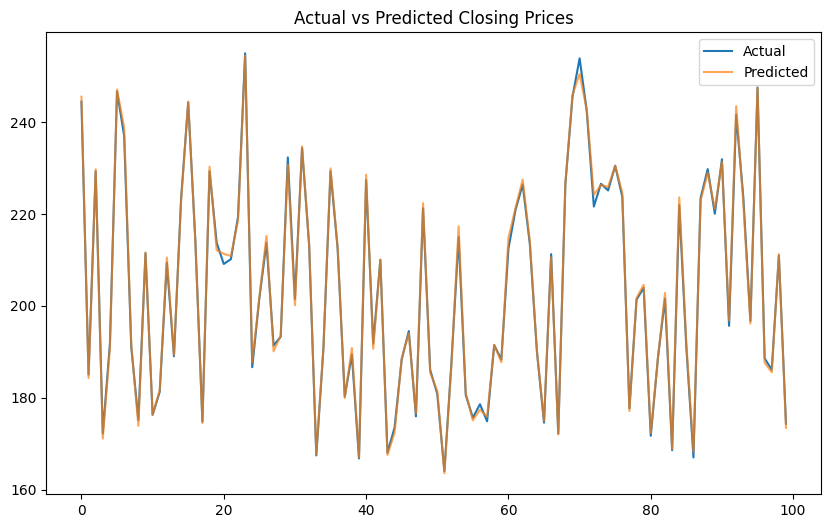

In [6]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()
